In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('/content/Daily_Public_Transport_Passenger_Journeys_by_Service_Type_20250603.csv')
df.head()

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,30/08/2024,16436,10705,225,19026,3925,59.0
1,15/09/2023,15499,10671,267,18421,4519,61.0
2,28/12/2021,1756,2352,0,3775,0,13.0
3,11/01/2023,10536,8347,223,14072,0,48.0
4,11/09/2021,820,612,0,1283,0,11.0


In [3]:
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
df = df.sort_values(by='Date').reset_index(drop=True) #sort the data with date
df.head(10)

,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2019-07-01,15987,9962,407,21223,3715,NaN
1,2019-07-02,16895,10656,409,21715,3993,NaN
2,2019-07-03,16613,10658,427,22025,3638,NaN
3,2019-07-04,16604,10445,437,21868,3576,NaN
4,2019-07-05,16040,10532,400,20697,2856,NaN
5,2019-07-06,5214,6141,0,6925,0,NaN
6,2019-07-07,4065,4332,0,5426,0,NaN
7,2019-07-08,13078,9442,422,18848,0,0.0
8,2019-07-09,13835,10550,455,19862,0,1.0
9,2019-07-10,13856,10066,421,19502,0,1.0


In [4]:
journey_columns = ['Local Route', 'Light Rail', 'Peak Service', 'Rapid Route', 'School', 'Other']
df[journey_columns] = df[journey_columns].replace(0, np.nan)

df[journey_columns] = df[journey_columns].bfill().ffill()

print('Remaining NaN values after bfill and ffill:')
print(df[journey_columns].isnull().sum())

print('\nRemaining 0 values after bfill and ffill:')
print((df[journey_columns] == 0).sum())

df.head(10)

Remaining NaN values after bfill and ffill:
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64

Remaining 0 values after bfill and ffill:
Local Route     0
Light Rail      0
Peak Service    0
Rapid Route     0
School          0
Other           0
dtype: int64


,Date,Local Route,Light Rail,Peak Service,Rapid Route,School,Other
0,2019-07-01,15987,9962.0,407.0,21223.0,3715.0,1.0
1,2019-07-02,16895,10656.0,409.0,21715.0,3993.0,1.0
2,2019-07-03,16613,10658.0,427.0,22025.0,3638.0,1.0
3,2019-07-04,16604,10445.0,437.0,21868.0,3576.0,1.0
4,2019-07-05,16040,10532.0,400.0,20697.0,2856.0,1.0
5,2019-07-06,5214,6141.0,422.0,6925.0,5332.0,1.0
6,2019-07-07,4065,4332.0,422.0,5426.0,5332.0,1.0
7,2019-07-08,13078,9442.0,422.0,18848.0,5332.0,1.0
8,2019-07-09,13835,10550.0,455.0,19862.0,5332.0,1.0
9,2019-07-10,13856,10066.0,421.0,19502.0,5332.0,1.0


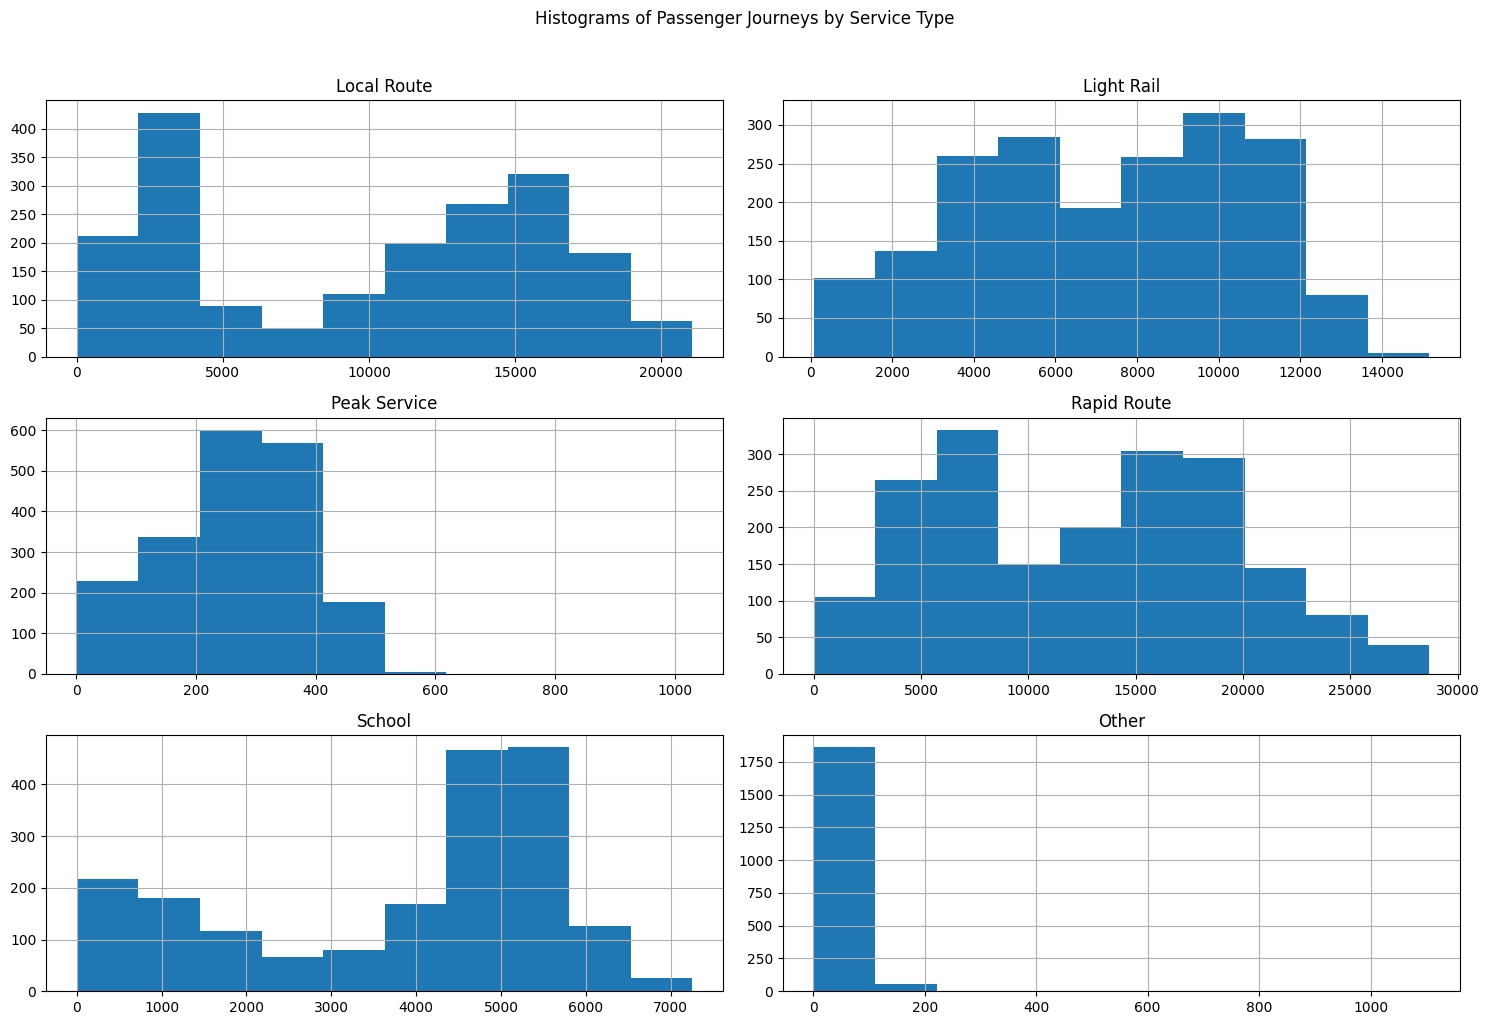

In [5]:
import matplotlib.pyplot as plt

# Generate histograms for each journey column
df[journey_columns].hist(figsize=(15, 10))
plt.suptitle('Histograms of Passenger Journeys by Service Type', y=1.02)
plt.tight_layout()
plt.show()

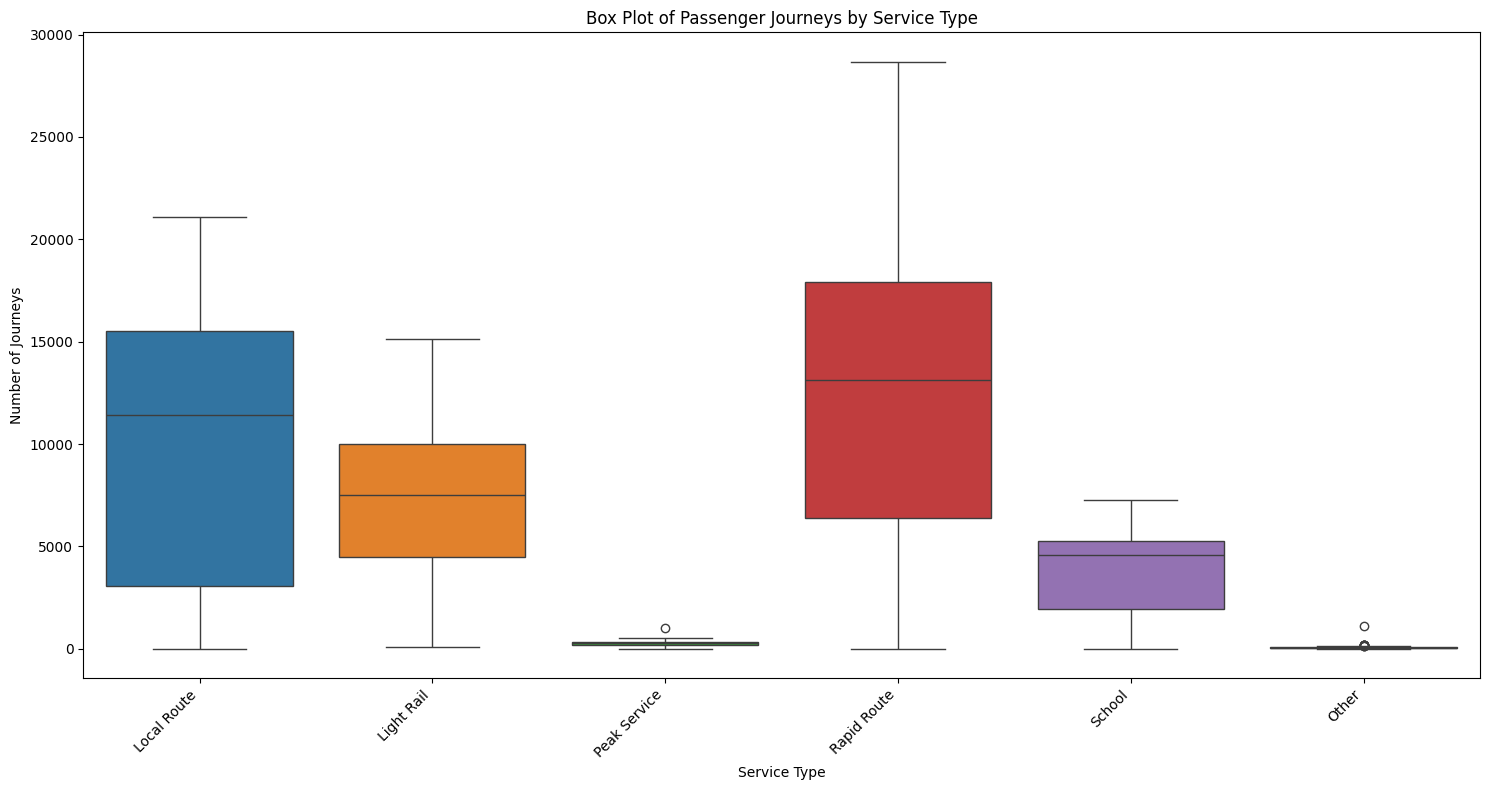

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 8))
sns.boxplot(data=df[journey_columns])
plt.title('Box Plot of Passenger Journeys by Service Type')
plt.ylabel('Number of Journeys')
plt.xlabel('Service Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
outliers_count = {}
for col in journey_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers
    col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outliers_count[col] = len(col_outliers)

print("Number of outliers for each service type (based on IQR method):")
for col, count in outliers_count.items():
    print(f"{col}: {count}")

Number of outliers for each service type (based on IQR method):
Local Route: 0
Light Rail: 0
Peak Service: 1
Rapid Route: 0
School: 0
Other: 10


In [10]:
df_cleaned = df.copy()
for col in journey_columns:
    Q1 = df_cleaned[col].quantile(0.25)
    Q3 = df_cleaned[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_cleaned = df_cleaned[(df_cleaned[col] >= lower_bound) & (df_cleaned[col] <= upper_bound)]

print(f"Original DataFrame shape: {df.shape}")
print(f"Cleaned DataFrame shape (after outlier removal): {df_cleaned.shape}")

Original DataFrame shape: (1918, 7)
Cleaned DataFrame shape (after outlier removal): (1907, 7)


In [11]:
output_filename = '/content/preprocessed_daily_transport_journeys.csv'
df_cleaned.to_csv(output_filename, index=False)
print(f"Preprocessed data saved to {output_filename}")

Preprocessed data saved to /content/preprocessed_daily_transport_journeys.csv
